# Using Health Factors to Predict Heart Disease Diagnosis

## 1. Introduction

Heart disease comprises a variety of conditions that affect the heart such as coronary heart disease (blood vessel narrowing), arrhythmia (abnormal heartbeat), cardiomyopathy (heart muscle disease), and more (Mayo Foundation for Medical Education and Research, 2022). There are many risk factors associated with the disease including high cholesterol, high blood pressure, obesity, and smoking. Heart disease is the leading cause of death in the United States and the second leading cause of death in Canada (Centers for Disease Control and Prevention, 2023; Government of Canada, 2022). Due to its prevalence, conducting data analyses such as the following are important so we can better understand one’s risk for the disease and take early steps to prevent or treat it. 

The question we will be trying to answer with this analysis is: Can health factors be used to predict heart disease diagnosis?

To answer this question, we will be using the Cleveland dataset in the Heart Disease database from UC Irvine Machine Learning Repository (Janosi et al., 1988).
This dataset originally contained 76 attributes; howvever, only 14 of them were used: age, sex, chest pain (cp), resting blood pressure (trestbps), cholesterol (chol), fasting blood sugar (fbs), electrocardiogram reading at rest (restecg), maximum heart rate (thalach), exercise induced angina (exang), ST depression induced by exercise (oldpeak), exercise segment slope (slope), number of major vessels coloured by fluoroscopy (ca), heart condition (thal), and diagnosis of heart disease (num). From the 14 outlined above, we began our analysis by first looking at cholesterol, resting blood pressure, age, maximum heart rate and ST depression induced by exercise, then further narrowed this list down to age, maximum heart rate and ST depression induced by exercise based on our analysis. Through classification techniques such as K-nearest neighbours, we will use these variables to predict diagnosis of heart disease. 

## 2. Preliminary Exploratory Data Analysis

### Loading in libraries

In [1]:
library(tidyverse)
library(ggplot2)
library(cowplot)
library(tidymodels)
library(repr)

install.packages("themis")
library(themis)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘cowplot’ was built under R version 4.3.2”

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1

## 3. Methods

Our final goal is to create a K nearest neighbours (KNN) classification model that predicts the 'heart_disease_diagnosis' using the predictor variable that we choose to be optimal. We will do this through the following steps:
1. Read-in the dataset from the URL
2. Tidy the dataset
3. Split the data into training and testing datasets
4. Analyze the dataset using scatter-plots to determine which variable has the optimal significance. By plotting different variables in the training dataset we can see how different variables vary in range over different 'heart_disease_diagnosis' categories.
5. Find the optimal $k$ value using cross validation and build the model.
6. Evaluate the model
7. Present conclusions and takeaways from our model

### 1. Reading in the data
* We read the data directly from the url
* We will have to assign column names to the dataset as it is labelled
* For the target variable we are interested in, we will have to turn it into a factor
* We will select the possible predictor variables which have numerical values, and exclude the variables that are categorical (we do not consider them as predictors for this analysis).

In [2]:
#let's read the data in from online
heart_disease <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
colnames(heart_disease) <- c("age", "sex", "chest_pain", "trest_bps", "chol", "fbs", "resting_ecg", 
                             "max_hr", "exer_agina", "st_depr", "exercise_segment_slope", 
                             "num_major_vessels", "heart_condition", "disease_diagnosis")


print("Figure 1.0: Heart Disease Dataset")
heart_disease

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Figure 1.0: Heart Disease Dataset"


age,sex,chest_pain,trest_bps,chol,fbs,resting_ecg,max_hr,exer_agina,st_depr,exercise_segment_slope,num_major_vessels,heart_condition,disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


#### Figure 1: Reading CSV File into R and Assigning Column Names

We began by loading the required library packages and then read our data into R using the url directly. We labelled the 14 column names of the tibble that contains 302 rows in total.

### 2. Tidying the dataset

In [3]:
# Let's clean up the table by giving the categorical names to the values 
# of the variables which should be factors

heart_disease <- heart_disease |>
                mutate(disease_diagnosis = as.factor(disease_diagnosis)) 


print("Figure 2.0: Mutated Dataset")
heart_disease

[1] "Figure 2.0: Mutated Dataset"


age,sex,chest_pain,trest_bps,chol,fbs,resting_ecg,max_hr,exer_agina,st_depr,exercise_segment_slope,num_major_vessels,heart_condition,disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


#### Figure 2: Tidied Dataset

Using the mutate function, we converted the disease diagnosis output from a numerical variable to a categorical variable so that we can predict it using KNN classification.

One thing we notice in the dataframe is that there are very few observations that have the "severe" diagnosis for heart disease (denoted as 4). In fact, it looks like most of the observations say that the patient has no disease, this is something we will have to keep in mind for constructing our KNN-classification model later.

In [4]:
# we do not need all of these variables, so let's take the ones that seem most useful
heart_select <- heart_disease |>
            select(age, trest_bps, chol, max_hr, st_depr, disease_diagnosis)

print("Figure 2.1: Selected Dataset")
glimpse(heart_select)

[1] "Figure 2.1: Selected Dataset"
Rows: 302
Columns: 6
$ age               <dbl> 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, …
$ trest_bps         <dbl> 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 14…
$ chol              <dbl> 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 29…
$ max_hr            <dbl> 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 15…
$ st_depr           <dbl> 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.…
$ disease_diagnosis <fct> 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0…


#### Figure 2.1: Refining the Tidy Dataset

Based on the table in Figure 2, we determined which of the 14 attributes would be most useful in our data analysis. Using the select function, we deciced to further evaluate age, resting blood pressure, cholesterol, maximum heart rate, ST depression induced by exercise, and our response variable, disease diagnosis. 

In [5]:
#Let's see if there are any N/A (marked by "?") values for the variable we want to predict.
#these variables could be heart_condition or heart_disease_diagnosis

heart_disease_na <- filter(heart_select, disease_diagnosis ==  "?")
print("Table 2.2: NA Values")
heart_disease_na

[1] "Table 2.2: NA Values"


age,trest_bps,chol,max_hr,st_depr,disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>


#### Figure 2.2: Filtering for N/A Values

Next, we used the filter function to determine the amount of N/A values (indicated by "?") in our response variable. Based on figure 2.2, we can see that heart_disease_diagnosis has no rows with N/A values. 

Let's continue with our analysis by splitting our wrangled data into training and testing data.

### 3. Splitting data for training and testing

* We will split the data into a 75% training-testing split with 75% of the data in the training set and 25% in the testing set.

In [6]:
set.seed(90) 
# Let's do a 75% split into training data and 25% into testing.

heart_split <- initial_split(heart_select, prop = 0.75, strata = disease_diagnosis)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

### 4. Analyzing training data

Lets look at the instances of the diagnosis in the training set by grouping by diagnosis class and then counting occurances.

In [7]:
instances <- heart_training |>
    group_by(disease_diagnosis) |>
    summarize(instances = n())

print("Table 4.0: Instances")
instances

[1] "Table 4.0: Instances"


disease_diagnosis,instances
<fct>,<int>
0,122
1,40
2,27
3,25
4,11


#### Figure 3: Summarizing Disease Diagnosis in Training Data

Next we looked at the instances of disease diagnosis in our training set using the group_by and summarize functions. This allows us to count the occurances of each disease diagnosis severity. We see that most of the diagnosis are of the "no disease" category with very few in the "severe" category. This aligns with our initial observation in the dataset before splitting. 

Let's now look into the mean values of the predictors for each category. 

In [8]:
mean_values <- heart_training |>
    group_by(disease_diagnosis) |>
    summarize(age_mean = mean(age),
             trest_bps_mean = mean(trest_bps),
             chol_mean = mean(chol),
             max_hr_mean = mean(max_hr),
            st_depr_mean = mean(st_depr))

print("Table 4.1: Mean Variables Table")
mean_values

[1] "Table 4.1: Mean Variables Table"


disease_diagnosis,age_mean,trest_bps_mean,chol_mean,max_hr_mean,st_depr_mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,52.89344,129.4180,243.5902,158.8770,0.5852459
1,54.95000,135.7500,244.6750,144.8000,1.0250000
2,58.92593,134.0370,264.2222,135.0370,1.7407407
3,56.80000,137.6400,246.2400,132.0000,1.9760000
4,58.45455,137.1818,246.6364,140.8182,2.1909091


#### Figure 4.1: Summary of Predictor Variable Means

We used the group_by and summarize functions to calculate the means of our predictor variables in relation to disease diagnosis. From this step we notice that:
* There might be a positive relationship between st depression induced by exercise(st_depr_mean) and the diagnosis
* The maximum heart rate for patients without heart disease is higher than with a heart disease diagnosis.
* The mean values for most predictor values are close to each other indicating that if there is any relationship between predictor value and diagnosis, it is not very strong.

In order for us to determine how we should choose our predictors for our KNN-classification, let's check the distribution of each potential predictor against heart disease diagnosis.

[1] "Figure 4.1: Potential Predictors Distribution"


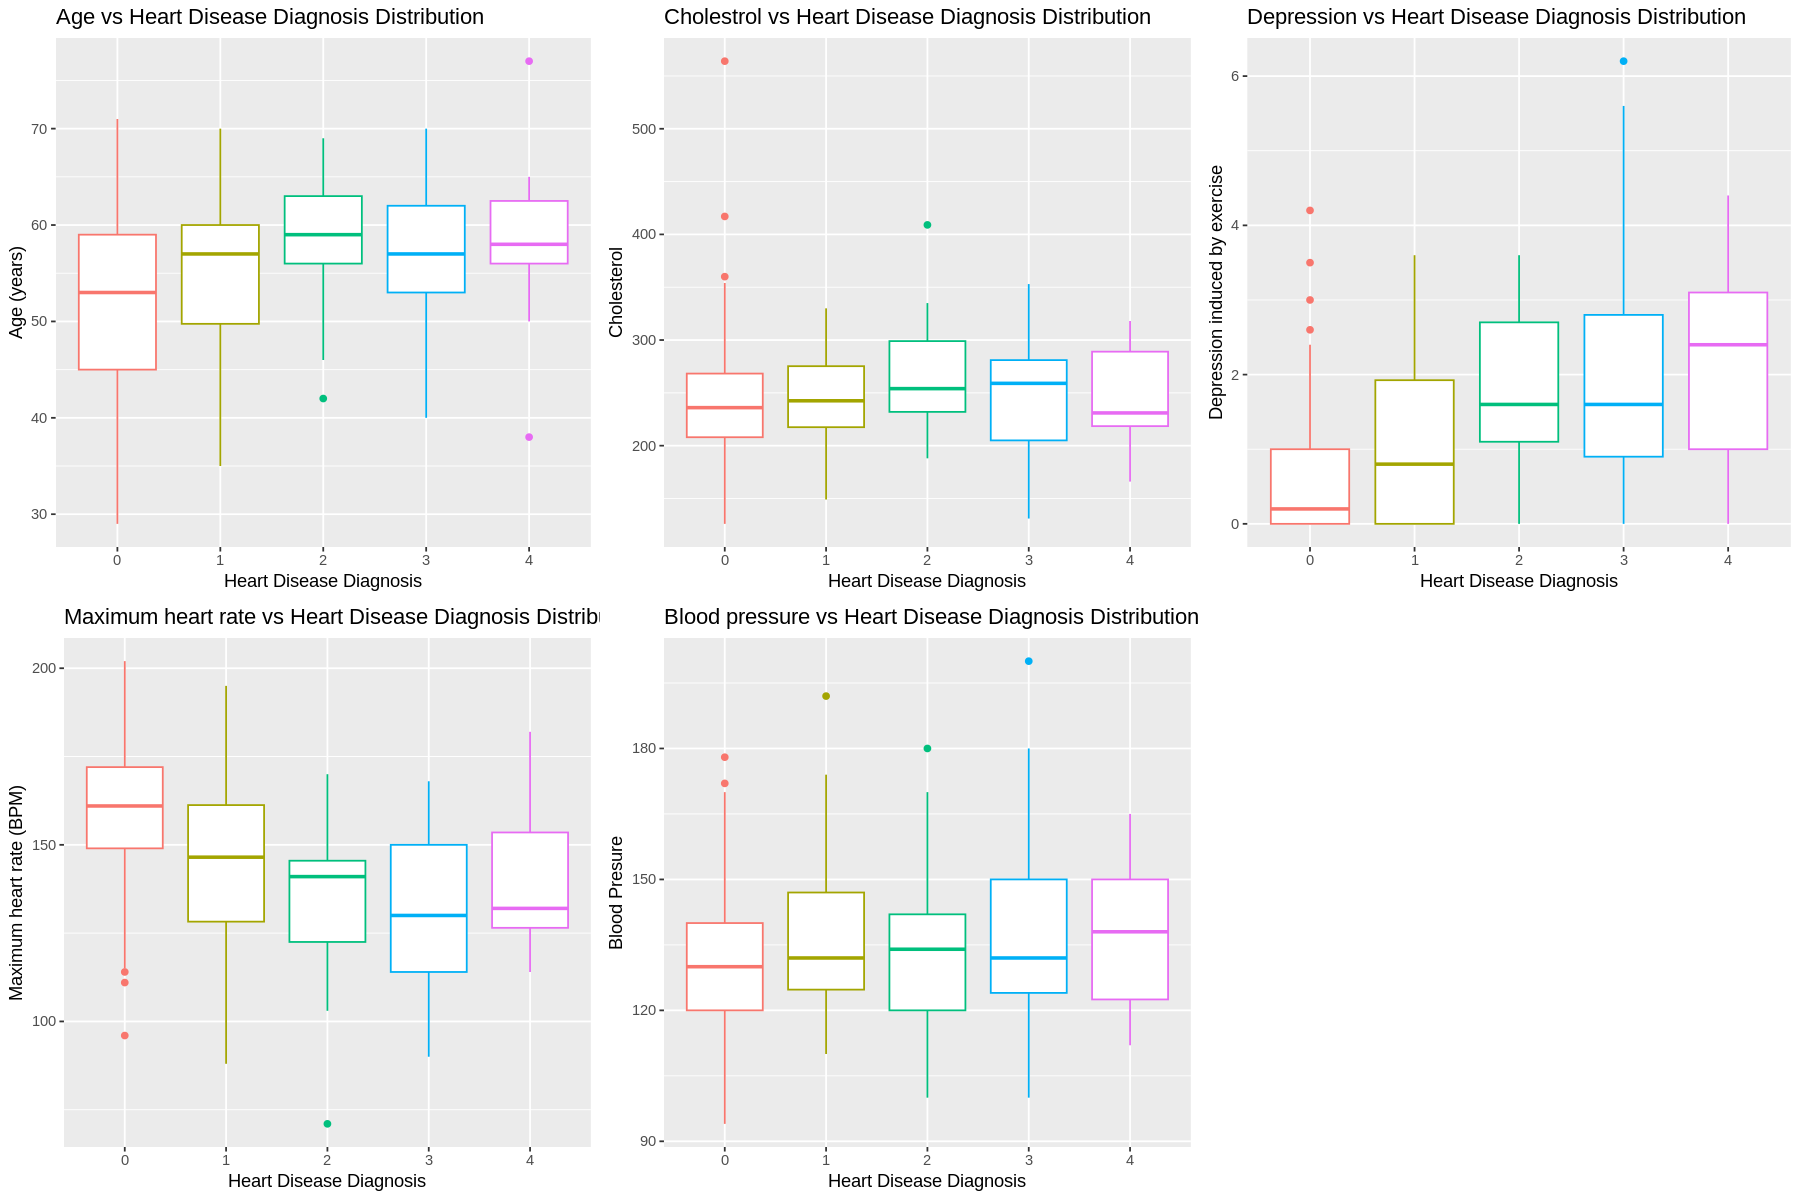

In [9]:
#age
diag_vs_age <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = age, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Age vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Age (years)")

#cholesterol
diag_vs_chol <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = chol, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Cholestrol vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Cholesterol")


#ST depression
diag_vs_depr <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = st_depr, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Depression vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Depression induced by exercise")

#max heart rate
max_hr_vs_depr <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = max_hr, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Maximum heart rate vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Maximum heart rate (BPM)")

#blood pressure
bp_vs_depr <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = trest_bps, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Blood pressure vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Blood Presure")

options(repr.plot.width = 15, repr.plot.height = 10)
visualize <- plot_grid(diag_vs_age, diag_vs_chol, diag_vs_depr, max_hr_vs_depr, bp_vs_depr)

print("Figure 4.1: Potential Predictors Distribution")
visualize

#### Figure 4.2: Distribution of Potential Predictors vs Response Variable

We used box plots to show the distribution of our initial predictor variables (numerical variables) in our response variable (categorical variable). After seeing the distribution and range of values for each of the predictor variables, it appears that the ones which may be the weakest are trest_bps (blood pressure) and chol (cholesterol). This is because the medians stay mostly constant throughout the box plots for the two variables.

Therefore, we will use age, st_depr (depression in ST scale), and max_hr (maximum heart rate) as our predictor variables. These variables like good predictors because the variety in their range suggests that they will have a significant influence on a patient's diagnosis.

#### Visualizing the Predictors

[1] "Figure 4.2: Predictor Plots"


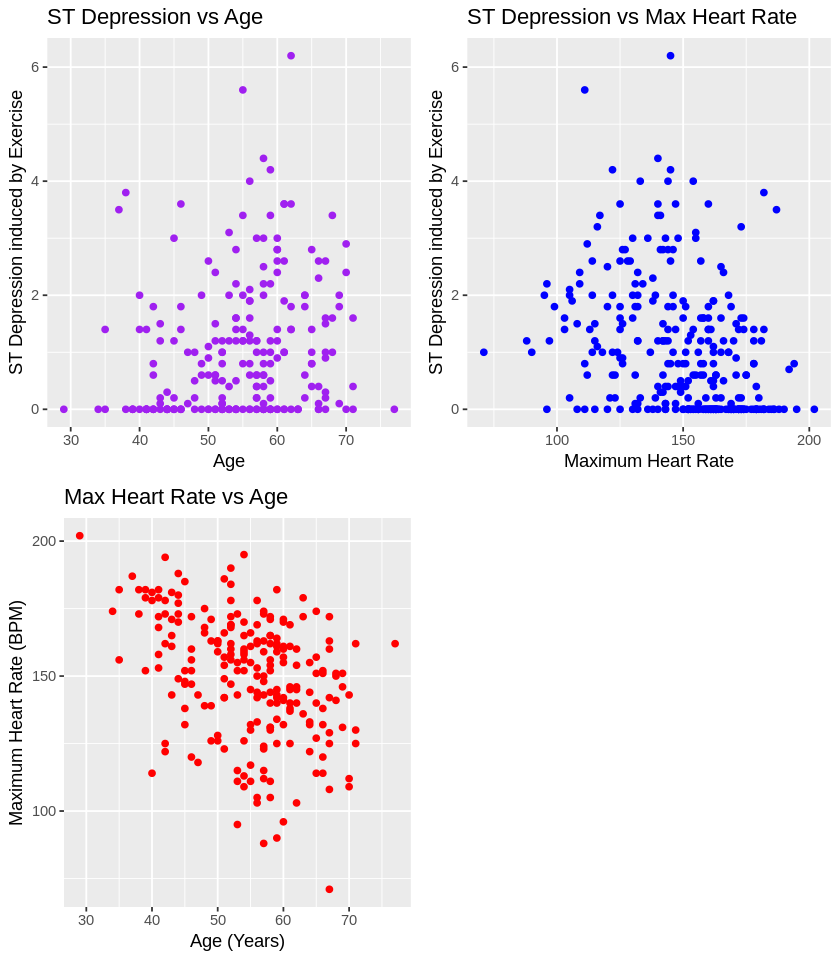

In [10]:
options(repr.plot.height = 8, repr.plot.width = 7)

st_depr_vs_age <- heart_training |>
    ggplot(aes(x = age, y = st_depr)) +
    geom_point(colour = "purple") +
    labs(title = "ST Depression vs Age",
        x = "Age", y = "ST Depression induced by Exercise")

max_hr_vs_depr <- heart_disease |>
    ggplot(aes(x = max_hr, y = st_depr)) +
    geom_point(colour = "blue") +
    labs(title = "ST Depression vs Max Heart Rate",
        x = "Maximum Heart Rate", y = "ST Depression induced by Exercise")


max_hr_vs_age <- heart_training |>
    ggplot(aes(x = age, y = max_hr)) +
    geom_point(colour = "red") +
    labs(title = "Max Heart Rate vs Age",
        x = "Age (Years)", y = "Maximum Heart Rate (BPM)")

print("Figure 4.2: Predictor Plots")
predictor_plots <- plot_grid(st_depr_vs_age, max_hr_vs_depr, max_hr_vs_age)
predictor_plots

#### Figure 4.3: Predictor Plots

We visualized our predictors against one another in scatter plots using proper visualization techniques. As we can see above, most of these predictors do not have a destinct relationship that follows any strong linear trend. An exception to this may be the relationship in the Max Heart Rate vs ST Depression as there seems to be a decreasing relationship; however, the the plot is fairly cloudy so the relationship is not strong. Overall, the independence of the relationships that our predictors above have with one another suggest that we have wisely chosen our predictor variables, which will lower interference from collinearity. 

### 5. Finding an optimal k value 
Now we need to find out what an optimal k-value will be for our KNN-classification using cross validation
* First we create a recipe and scale and center the data
* Then, we'll perform a 5-fold cross validation
* The $k$ values for cross validation will be from 1 to 100
* We then represent our results as a plot

In [11]:
unique(heart_training$disease_diagnosis)


[1] 0 4 1 2 3
Levels: 0 1 2 3 4

In [12]:
options(repr.plot.height = 6, repr.plot.width = 7)

heart_recipe <- recipe(disease_diagnosis ~ age + max_hr + st_depr, data = heart_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 

print("Figure 5.0: Recipe")
heart_recipe

heart_vfold <- vfold_cv(heart_training, v = 5, strata = disease_diagnosis)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
         set_engine("kknn") |>
         set_mode("classification")


[1] "Figure 5.0: Recipe"




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



[1] "Best K-Value:"


[1] 21 22

[1] "Figure 5.1: Cross-Validation"


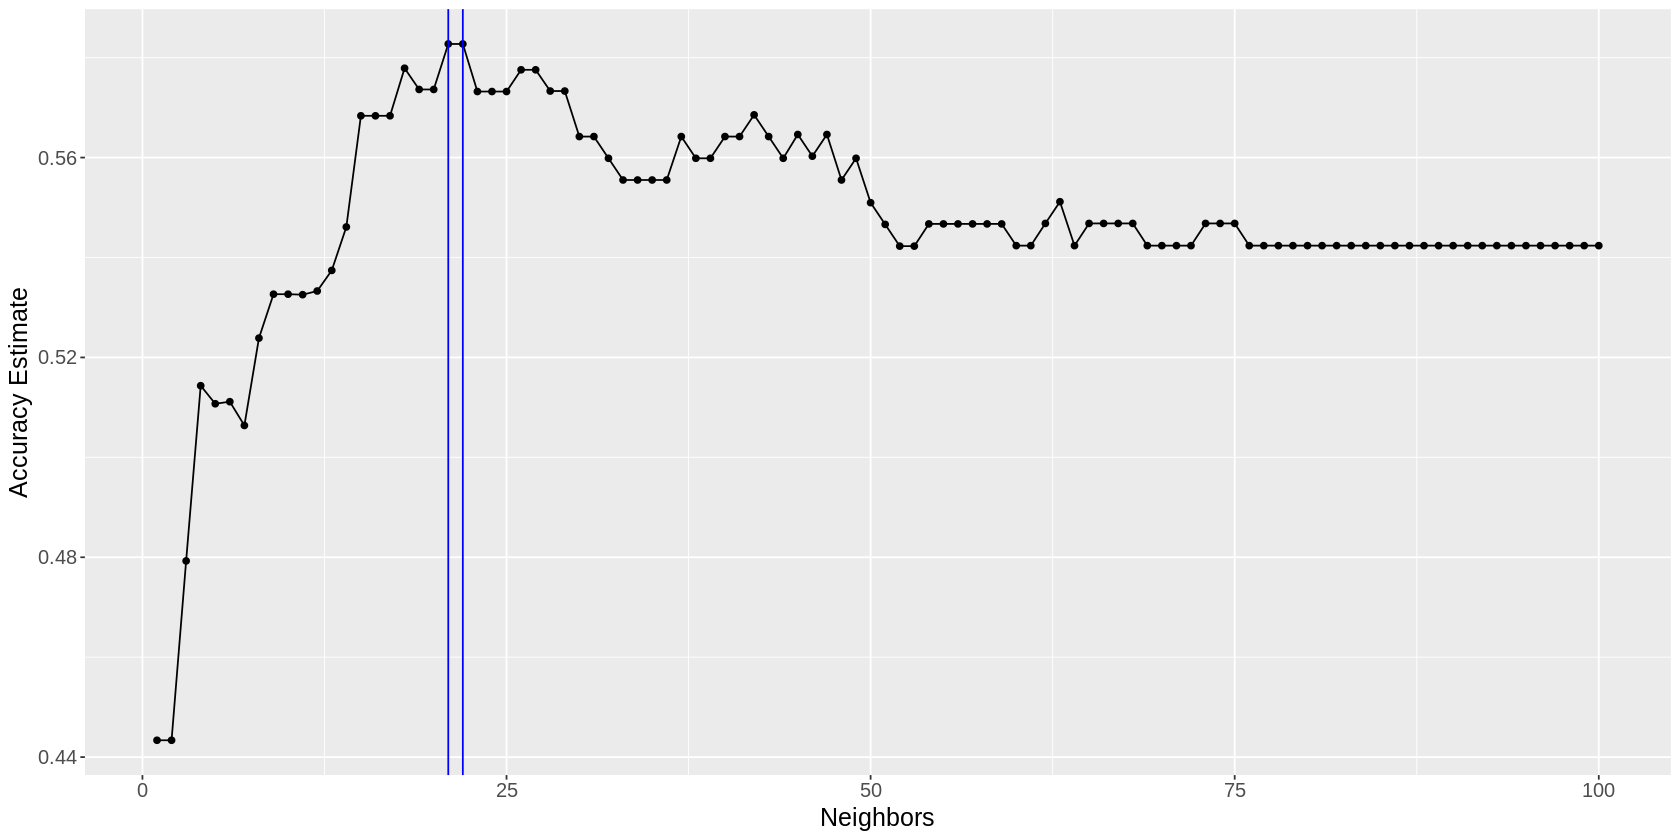

In [13]:
set.seed(120) 
options(repr.plot.width = 14, repr.plot.height = 7)

gridvals = tibble(neighbors = seq(from = 1, to = 100, by = 1))

heart_results <- workflow() |>
            add_recipe(heart_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = heart_vfold, grid = gridvals) |>
            collect_metrics()

# taking the best k-value
best_k <- heart_results |>
    filter(.metric == "accuracy") |>
    slice_max(mean) |>
    pull(neighbors)
print("Best K-Value:")
best_k

accuracies <- heart_results |>
            filter(.metric == "accuracy")

cross_val_plot <- accuracies |>
            ggplot(aes(x = neighbors, y = mean)) + 
                geom_point() +
                geom_line() +
                geom_vline(xintercept = best_k, colour = "blue") +
                labs(x = "Neighbors", y = "Accuracy Estimate") + 
                theme(text = element_text(size = 15))

print("Figure 5.1: Cross-Validation")
cross_val_plot

#### Figure 5.1: Cross-Validation

After using our recipe to scale and center our predictors, we performed a 5-fold cross-validation. Based on the plot, we see that k=21 is the optimal k value to provide a high accuracy estimate, so this is the k value that we will use in our model for prediction. 

In [14]:
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 21) |>
        set_engine("kknn") |>
        set_mode("classification")

heart_fit <- workflow() |>
        add_recipe(heart_recipe) |>
        add_model(heart_spec) |>
        fit(data = heart_training)

print("Figure 5.2: Fit")
heart_fit

[1] "Figure 5.2: Fit"


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4088889
Best kernel: rectangular
Best k: 21

### 6. Evaluation and Conclusion of model


Now we apply our trained model to the testing set.

[1] "Table 6.1: Model Accuracy"


.metric,.estimate
<chr>,<dbl>
accuracy,0.5324675


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


[1] "Figure 6.2: Matrix"


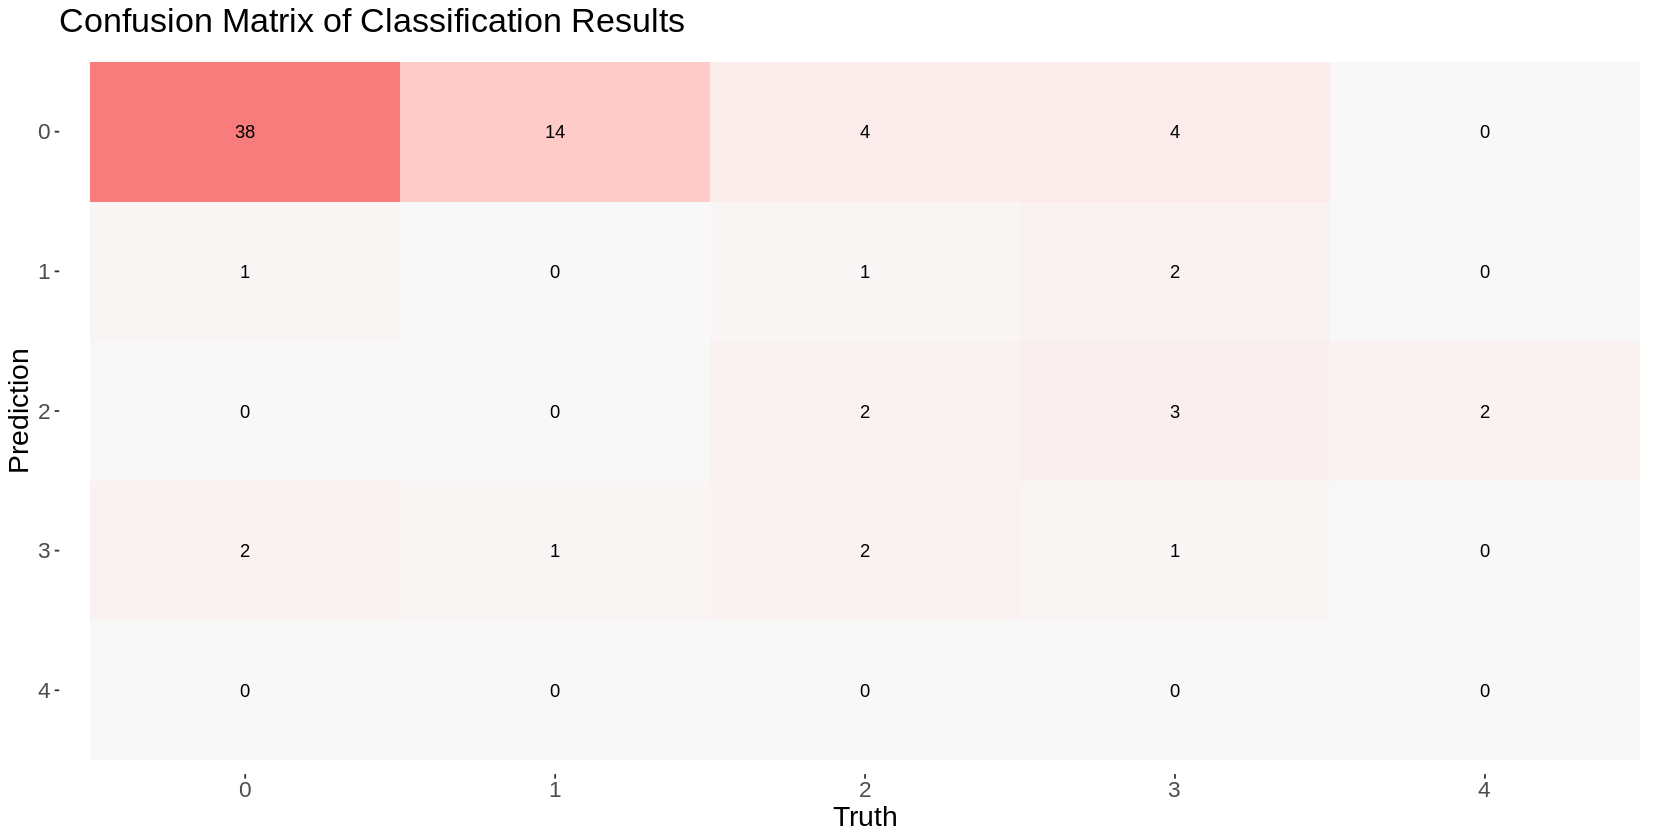

In [15]:
# Finding the accuracy of our prediction

heart_predictions <- predict(heart_fit, heart_testing) |>
        bind_cols(heart_testing)

heart_metrics <- heart_predictions |>
        metrics(truth = disease_diagnosis, estimate = .pred_class) |>
        filter(.metric == "accuracy") |>
        select(.metric, .estimate)
print("Table 6.1: Model Accuracy")
heart_metrics

heart_conf_mat <- heart_predictions |>
        conf_mat(truth = disease_diagnosis, estimate = .pred_class)

heart_matrix <- heart_conf_mat |>
        autoplot(type = "heatmap") +
        scale_fill_gradient(low = "#f8f8f8", high = "#f87c7c") + 
        theme(text = element_text(size = 17)) + 
        labs(title = "Confusion Matrix of Classification Results")
print("Figure 6.2: Matrix")
heart_matrix

#### Figure 6: Model Accuracy and Confusion Matrix

Here, we applied our training model to the testing set and determined that our model has a prediction accuracy of 53.25% when classifying objects in the testing set (Table 6.1).

We also made a confusion matrix (Figure 6.2) to display when the response variable was predicted both correctly and incorrectly in our testing set. Based on this output, we can we that most of the successful predictions occurred when the person did not have a heart disease diagnosis. This could be because of an overwhelming number of data points that indicated the absence of heart disease causing the model to overfit for that diagnosis.

### Checking Our Predictors with KNN Predictions 

In [17]:
set.seed(210) 
heart_split_2 <- initial_split(heart_select, prop = 0.75, strata = disease_diagnosis)
heart_training_2 <- training(heart_split_2)
heart_testing_2<- testing(heart_split_2)

In [18]:
set.seed(120) 

hr_recipe <- recipe(disease_diagnosis ~ max_hr, data = heart_training_2) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 

age_recipe <- recipe(disease_diagnosis ~ age, data = heart_training_2) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 

depr_recipe <- recipe(disease_diagnosis ~ st_depr, data = heart_training_2) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 

In [19]:

gridvals_2 = tibble(neighbors = seq(from = 1, to = 50, by = 1))

hr_results <- workflow() |>
            add_recipe(hr_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = heart_vfold, grid = gridvals_2) |>
            collect_metrics()

depr_results <- workflow() |>
            add_recipe(hr_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = heart_vfold, grid = gridvals_2) |>
            collect_metrics()

age_results <- workflow() |>
            add_recipe(hr_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = heart_vfold, grid = gridvals_2) |>
            collect_metrics()
age_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.4416701,5,0.039330302,Preprocessor1_Model01
1,roc_auc,hand_till,0.5199108,5,0.014845424,Preprocessor1_Model01
2,accuracy,multiclass,0.4405245,5,0.026462163,Preprocessor1_Model02
2,roc_auc,hand_till,0.5133724,5,0.013141577,Preprocessor1_Model02
3,accuracy,multiclass,0.4858523,5,0.031954077,Preprocessor1_Model03
3,roc_auc,hand_till,0.4921893,5,0.016152213,Preprocessor1_Model03
4,accuracy,multiclass,0.4679503,5,0.032493662,Preprocessor1_Model04
4,roc_auc,hand_till,0.5168104,5,0.016770599,Preprocessor1_Model04
5,accuracy,multiclass,0.5069841,5,0.012810150,Preprocessor1_Model05


In [20]:
# taking the best k-value of Max Heartrate
best_k_hr <- hr_results |>
    filter(.metric == "accuracy") |>
    slice_max(mean) |>
    pull(neighbors)
print("Best K-Value For Max Heart Rate:")
best_k_hr


# taking the best k-value for ST Depression Induced by Excercise
best_k_depr <- depr_results |>
    filter(.metric == "accuracy") |>
    slice_max(mean) |>
    pull(neighbors)
print("Best K-Value For ST Depression:")
best_k_depr

# taking the best k-value for Age
best_k_age <- age_results |>
    filter(.metric == "accuracy") |>
    slice_max(mean) |>
    pull(neighbors)
print("Best K-Value For ST Depression:")
best_k_age

[1] "Best K-Value For Max Heart Rate:"


[1] 47 48

[1] "Best K-Value For ST Depression:"


[1] 47 48

[1] "Best K-Value For ST Depression:"


[1] 47 48

In [27]:
hr_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 47) |>
        set_engine("kknn") |>
        set_mode("classification")

depr_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 47) |>
        set_engine("kknn") |>
        set_mode("classification")

age_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 47) |>
        set_engine("kknn") |>
        set_mode("classification")

In [28]:
hr_fit <- workflow() |>
        add_recipe(hr_recipe) |>
        add_model(hr_spec) |>
        fit(data = heart_training_2)

depr_fit <- workflow() |>
        add_recipe(depr_recipe) |>
        add_model(depr_spec) |>
        fit(data = heart_training_2)

age_fit <- workflow() |>
        add_recipe(age_recipe) |>
        add_model(age_spec) |>
        fit(data = heart_training_2)

In [29]:
hr_predictions <- predict(hr_fit, heart_testing_2) |>
        bind_cols(heart_testing)

depr_predictions <- predict(depr_fit, heart_testing_2) |>
        bind_cols(heart_testing_2)

age_predictions <- predict(age_fit, heart_testing_2) |>
        bind_cols(heart_testing_2)

hr_metrics <- hr_predictions |>
        metrics(truth = disease_diagnosis, estimate = .pred_class) |>
        filter(.metric == "accuracy") |>
        select(.metric, .estimate)
print("Table 7.1: Model Accuracy")
hr_metrics

depr_metrics <- depr_predictions |>
        metrics(truth = disease_diagnosis, estimate = .pred_class) |>
        filter(.metric == "accuracy") |>
        select(.metric, .estimate)
print("Table 7.1: Model Accuracy")
depr_metrics

age_metrics <- age_predictions |>
        metrics(truth = disease_diagnosis, estimate = .pred_class) |>
        filter(.metric == "accuracy") |>
        select(.metric, .estimate)
print("Table 7.1: Model Accuracy")
age_metrics


[1] "Table 7.1: Model Accuracy"


.metric,.estimate
<chr>,<dbl>
accuracy,0.4545455


[1] "Table 7.1: Model Accuracy"


.metric,.estimate
<chr>,<dbl>
accuracy,0.5714286


[1] "Table 7.1: Model Accuracy"


.metric,.estimate
<chr>,<dbl>
accuracy,0.5324675


In [32]:
hr_conf_mat <- hr_predictions |>
        conf_mat(truth = disease_diagnosis, estimate = .pred_class)
hr_conf_mat

depr_conf_mat <- depr_predictions |>
        conf_mat(truth = disease_diagnosis, estimate = .pred_class)
depr_conf_mat

age_conf_mat <- age_predictions |> 
        conf_mat(truth = disease_diagnosis, estimate = .pred_class)
age_conf_mat

          Truth
Prediction  0  1  2  3  4
         0 32 11  8  8  2
         1  1  2  0  1  0
         2  0  0  0  0  0
         3  8  2  1  1  0
         4  0  0  0  0  0

          Truth
Prediction  0  1  2  3  4
         0 40  9  5  5  3
         1  0  0  0  0  0
         2  1  4  4  4  2
         3  0  0  0  0  0
         4  0  0  0  0  0

          Truth
Prediction  0  1  2  3  4
         0 41 13  9  9  5
         1  0  0  0  0  0
         2  0  0  0  0  0
         3  0  0  0  0  0
         4  0  0  0  0  0

## 4. Discussion

Upon choosing age, max heart rate, and depression on ST scale as our three predictor variables, we trained our model and found that a K value of 21 had the greatest accuracy estimate. We applied our trained model on the testing set to find that the model could accurately classify level of heart disease 53.25% of the time. This is admittedly a very poor model, especially considering the application. This is not a fault in our code, but rather a fault in the dataset. As noted previously, there is a clear imbalance in the number of data points between the different levels of heart disease, with there being an abundance of level 0 heart disease and barely any level 4 heart disease. This resulted in a model that had sufficient training in classifying level 0 cases, but was ill-equipped to correctly classify more severe cases (see confusion matrix above). This was unfortunately something we expected, but served challenging to overcome given our current time and resources.

To better approach this in the future, we could invest more resources into sourcing a more robust dataset that has more data points for all levels of heart disease, ensuring that our model can be trained with adequate access to all cases. Once our future model has an acceptable predictor accuracy, it could have profound implications in the medical community, leading to a greater understanding of which factors correlate strongly to heart disease. Healthcare professionals would place greater emphasis in monitoring our predictor variables of age, max heart rate, and depression, as these will have proven to be linked to heart disease. 


#### Future questions could include:  
* How applicable are these findings to different populations around the world?
* How can we alleviate the effects of max heart rate and depression to weaken their link to heart disease?
* Are there any third variables at play beyond our predictor variables that may be more closely linked to heart disease?

### References

Centers for Disease Control and Prevention. (2023, May 15). *Heart Disease  Facts*. Heart Disease. https://www.cdc.gov/heartdisease/facts.htm#:~:text=Coronary%20heart%20disease%20is%20the,killing%20375%2C476%20people%20in%202021.&text=About%201%20in%2020%20adults,have%20CAD%20(about%205%25).&text=In%202021%2C%20about%202%20in,less%20than%2065%20years%20old. 

Government of Canada. (2022, July 28). *Heart Disease in Canada*. Public Health Agency of Canada. https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html 

 
Janosi, Andras, Steinbrunn, William, Pfisterer, Matthias, and Detrano, Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

Mayo Foundation for Medical Education and Research. (2022, August 25). *Heart disease*. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118 